# Multilayer ANNs

Mathematically:

First layer: $l_1 = \sigma({x^T_0.w_1})$  

Second layer:  $l_2 = \sigma({l_1^T.w_2}) = \sigma({\sigma({x^T_0.w_1})^T.w_2}) $  

and so on....

and final output, $\hat{y} = \sigma(w_n.(....(\sigma({\sigma({x^T_0.w_1})^T.w_2})^T...)^T)^T)$

Where 

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Creating Data

npc = 100 # 100 points per cluster 
blur = 1  # standard dev. to spread out the data

A = [1, 3]   # Centers of clusters
B = [1, -2]

# Generating data
a = [A[0] + np.random.randn(npc)*blur, A[1] + np.random.randn(npc)*blur]
b = [B[0] + np.random.randn(npc)*blur, B[1] + np.random.randn(npc)*blur]

# True labels
labels = np.vstack((np.zeros((npc, 1)), np.ones((npc, 1))))

# Concatenating into a matrix
data = np.hstack((a,b)).T

# convert to tensor
labels = torch.tensor(labels).float()
data = torch.tensor(data).float()

In [3]:
labels

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

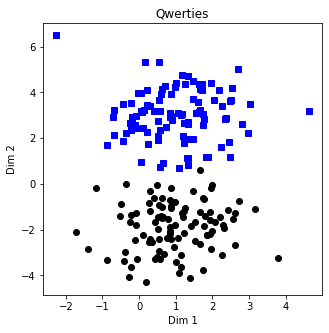

In [4]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.title('Qwerties')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

## Adding more layers to NN

Number of hidden layers and neurons in each layer are subject to user's choice

In [5]:
# Model Architecture

def ANNModel(lr):
    
    ANN = nn.Sequential(
        nn.Linear(2,16),    # input layer with 2 inputs, calculates Wx + b
        nn.ReLU(),
        
        nn.Linear(16,1),    # Hidden Layer
        nn.ReLU(),
        
        nn.Linear(1,1),     # Output layer - one output feature
        nn.Sigmoid()        # Final activation unit
    )
    
    lossfn = nn.BCELoss()   # better to use with BCEWithLogits loss
    
    optim = torch.optim.SGD(ANN.parameters(), lr = lr)    # optimizer to learn model(ANN) parameters
    
    return ANN, lossfn, optim
    

### Training the model

In [6]:
nEp = 1000

def trainModel(ANN):
    
    losses = torch.zeros(nEp)
    
    for i in range(nEp):
        y = ANN(data)
        
        loss = lossfn(y, labels)
        losses[i] = loss
        
        # backprop
        optim.zero_grad()
        loss.backward()
        optim.step()
    
    # predictions after training
    pred = ANN(data)
    
    acc = 100 * torch.mean(((pred > 0.5) == labels).float())
    
    return losses, pred, acc      

Final accuracy : tensor(100.)


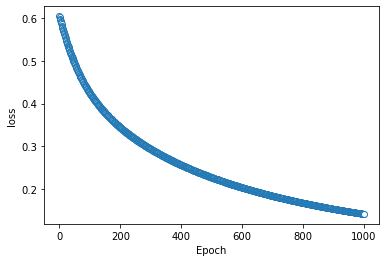

In [7]:
ANN, lossfn, optim = ANNModel(.01)

losses, pred, acc = trainModel(ANN)

print('Final accuracy :', acc.data)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.xlabel('Epoch'), plt.ylabel('loss')
plt.show()

### Testing on various lr

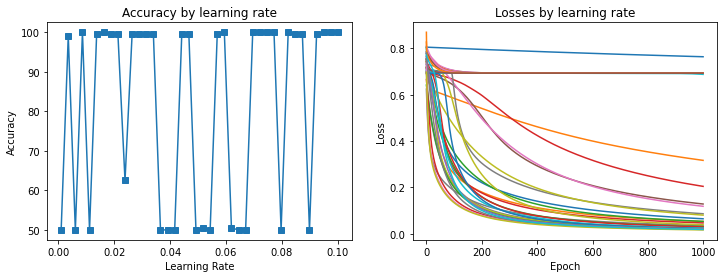

In [8]:
lr = np.linspace(0.001, 0.1, 40)

lr_acc = [] # accuracy by LR
all_loss = np.zeros((len(lr), nEp))

for i, lnr in enumerate(lr):
    ANN, lossfn, optim = ANNModel(lnr)
    losses, pred, acc = trainModel(ANN)
    
    lr_acc.append(acc)
    all_loss[i, :] = losses.detach()  


fig, ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(lr, lr_acc, 's-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(all_loss.T)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Losses by learning rate')
plt.show()

In [9]:
sum(torch.tensor(lr_acc) > 70)/len(lr_acc)

tensor(0.6250)

# Multi output ANN with Iris data

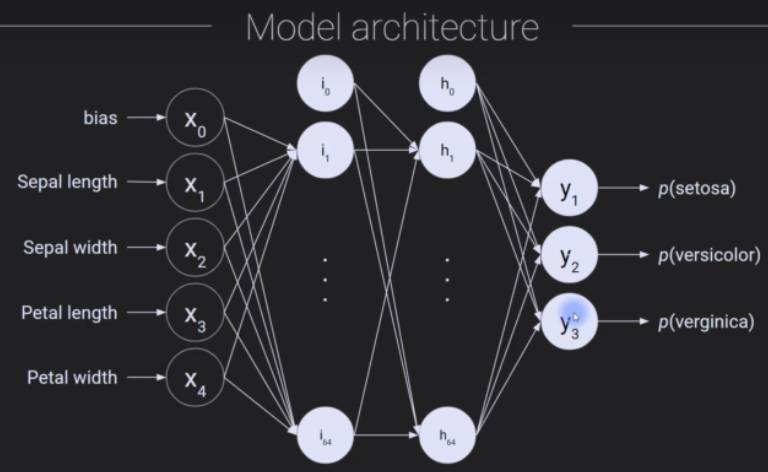

__Fully Connected__ - Each node in layer __n__ projects to each node in layer __n+1__. Each connection has its own weight.

For Multiclass classification, we do not use sigmoid for projecting final output, we use __softmax__ function:

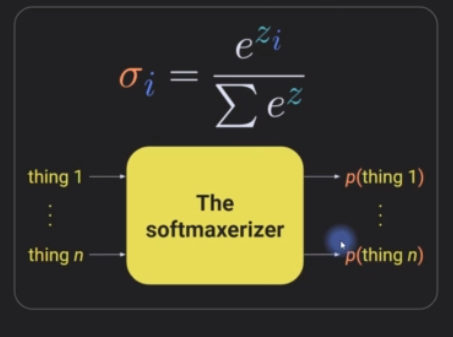

It gives some of all probabilities of classes as 1.
Without softmax, sum of all nodes of op layer will not match 1, which implies that they are not of a probability distribution. Softmax helps us convert the output values from nodes of op layer in NN, to 1.

In [10]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


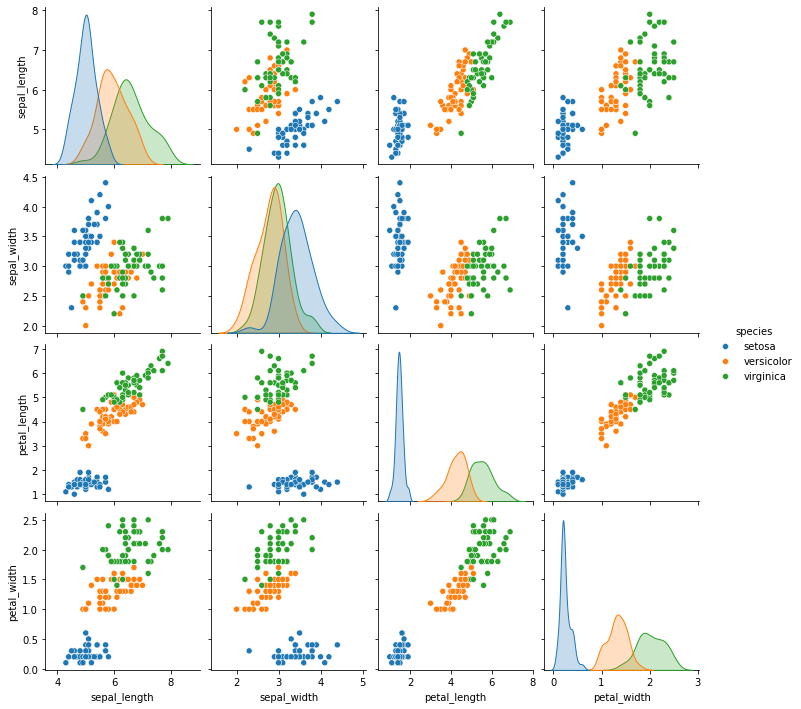

In [11]:
sns.pairplot(iris, hue='species')
plt.show()

In [12]:
# Organizing the data
data = torch.tensor(iris[iris.columns[:4]].values).float()

# transforming species to numbers
labels = torch.zeros(len(data), dtype=torch.long)
# Let Setosa already imply 0
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [13]:
labels.shape

torch.Size([150])

## Creating ANN model

In [14]:
MultiANN = nn.Sequential(
    nn.Linear(4, 64),    # ip layer
    nn.ReLU(),           # activation
    nn.Linear(64, 64),   # hidden Layer
    nn.ReLU(),           # activation
    nn.Linear(64, 3)     # op layer with 3 outputs, each implying a value with will be converted as probabilities by softmax
)

# loss function
# we haven't defined softmax layer above because the loss function below 
# automatically takes in the output values from NN and calculates 
# log softmax function of the ouputs before calculating the loss.
lossfn = nn.CrossEntropyLoss()

# optimizer
optim = torch.optim.SGD(MultiANN.parameters(), lr = 0.01)

### Training the model

In [15]:
nEp = 1000
losses = torch.zeros(nEp)
ongoingAcc = []

for i in range(nEp):
    
    #forward pass
    yHat = MultiANN(data)
    # compute loss
    loss = lossfn(yHat, labels)
    losses[i] = loss
    
    # backprop
    optim.zero_grad()
    loss.backward()
    optim.step()

    matches =  torch.argmax(yHat, axis=1) == labels
    matchesNum = matches.float()
    acc = 100*torch.mean(matchesNum)
    ongoingAcc.append(acc)

# prediction
pred = MultiANN(data)
pred_labels = torch.argmax(pred, axis=1)
totalAcc = 100*torch.mean((pred_labels == labels).float())

In [16]:
totalAcc

tensor(98.)

Final Accuracy : 98%


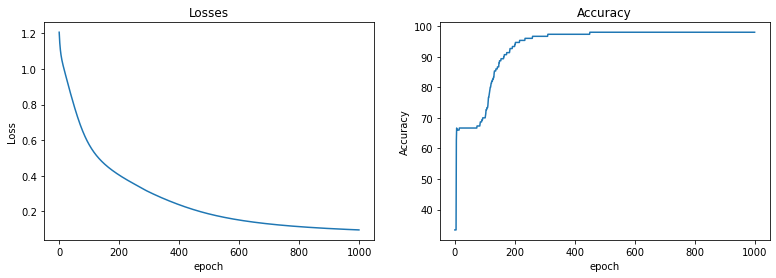

In [17]:
print('Final Accuracy : %g%%' %totalAcc)

fig, ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')

plt.show()

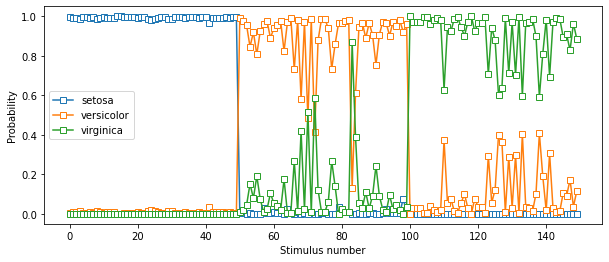

In [18]:
# visualizing softmax effect
sm = nn.Softmax(1)

fig = plt.figure(figsize=(10,4))

plt.plot(sm(yHat.detach()), 's-', markerfacecolor='w')
plt.xlabel('Stimulus number')
plt.ylabel('Probability')
plt.legend(['setosa', 'versicolor', 'virginica'])
plt.show()

## Experimenting with Hidden units

Adding upto 128 hidden units in the hidden layer and analysing performance

In [27]:
iris = sns.load_dataset('iris')
# Organizing the data
data = torch.tensor(iris[iris.columns[:4]].values).float()

# transforming species to numbers
labels = torch.zeros(len(data), dtype=torch.long)
# Let Setosa already imply 0
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [32]:
def CreateANN(n_hidden):
    
    IrisANN = nn.Sequential(
        nn.Linear(4, n_hidden),
        nn.ReLU(),
#         nn.Linear(n_hidden, n_hidden),
#         nn.ReLU(),
        nn.Linear(n_hidden, 3),
    )
    
    # loss function
    lossfn = nn.CrossEntropyLoss()

    # optimizer
    optim = torch.optim.SGD(MultiANN.parameters(), lr = 0.01)
    
    return IrisANN, lossfn, optim

In [37]:
def TrainModel(ANN, lossfn, optim):
    for i in range(nEp):

        #forward pass
        yHat = ANN(data)
        # compute loss
        loss = lossfn(yHat, labels)

        # backprop
        optim.zero_grad()
        loss.backward()
        optim.step()

    # prediction
    pred = ANN(data)
    pred_labels = torch.argmax(pred, axis=1)
    totalAcc = 100*torch.mean((pred_labels == labels).float())
    return totalAcc

In [38]:
n_hidden = np.arange(1,129)
nEp = 150
acc = []

for i in n_hidden:
    ANN, lossfn, optim = CreateANN(i)
    
    accuracy = TrainModel(ANN, lossfn, optim)
    acc.append(accuracy)

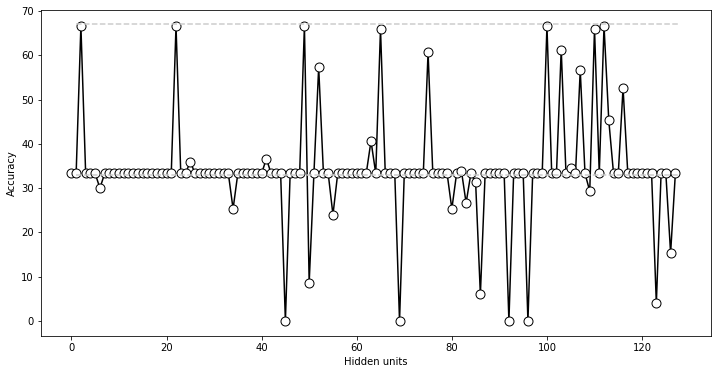

In [39]:
fig, ax = plt.subplots(1, figsize=(12,6))

ax.plot(acc, 'ko-', markerfacecolor='w', markersize=9)
ax.plot(n_hidden[[0,-1]], [33,33], '--', color=[.8,.8,.8])
ax.plot(n_hidden[[0,-1]], [67,67], '--', color=[.8,.8,.8])
ax.set_ylabel('Accuracy')
ax.set_xlabel('Hidden units')
plt.show()

## Breadth vs Depth of NN

Number of trainable parameters - weights of different layers and biases (arrows in the NN diagram represent wegihts. Number of nodes (apart from inp layer) represent the biases).

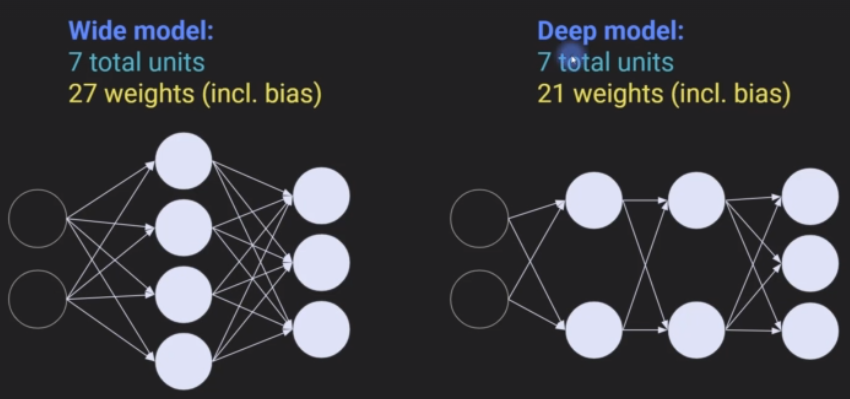

In [41]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [42]:
# Two Models

wideNet = nn.Sequential(
    nn.Linear(2, 4), # hidden layer
    nn.Linear(4, 3)  # op layer
)

deepNet = nn.Sequential(
    nn.Linear(2, 2), # hidden 1
    nn.Linear(2, 2), # hidden 2
    nn.Linear(2, 3), # op

)

print(wideNet)
print(' ')
print(deepNet)

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=3, bias=True)
)
 
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
  (2): Linear(in_features=2, out_features=3, bias=True)
)


In [44]:
# Looking at weights

for i in deepNet.named_parameters():
    print(i)

('0.weight', Parameter containing:
tensor([[ 0.2995, -0.0658],
        [-0.3464, -0.3153]], requires_grad=True))
('0.bias', Parameter containing:
tensor([ 0.4824, -0.3256], requires_grad=True))
('1.weight', Parameter containing:
tensor([[ 0.3815, -0.3412],
        [-0.6752, -0.1982]], requires_grad=True))
('1.bias', Parameter containing:
tensor([ 0.4764, -0.3268], requires_grad=True))
('2.weight', Parameter containing:
tensor([[ 0.0075, -0.5893],
        [-0.4101,  0.6887],
        [ 0.5709, -0.6042]], requires_grad=True))
('2.bias', Parameter containing:
tensor([-0.5595, -0.0323, -0.3745], requires_grad=True))


In [45]:
# Counting total number of nodes (number of biases)

nWide = 0

for i in wideNet.named_parameters():
    if 'bias' in i[0]:
        nWide += len(i[1])

nDeep = 0

for i in deepNet.named_parameters():
    if 'bias' in i[0]:
        nDeep += len(i[1])
        
print('Number of nodes in wide network:', nWide)
print('Number of nodes in deep network:', nDeep)

Number of nodes in wide network: 7
Number of nodes in deep network: 7


In [46]:
# counting total number parameters
nParam = 0
for i in wideNet.parameters():  # different from named_parameters where we don't get names as first element of the tuple
    if i.requires_grad:
        print('It has %s parameters' %i.numel())
        nParam += i.numel()

print('Total number of parameters:', nParam)

It has 8 parameters
It has 4 parameters
It has 12 parameters
It has 3 parameters
Total number of parameters: 27


In [47]:
nParam = np.sum([i.numel() for i in deepNet.parameters() if i.requires_grad])
print('Total number of parameters:', nParam)

Total number of parameters: 21


# Class version of nn.Sequential

This gives more flexibility in terms of organising the code and the network elements:

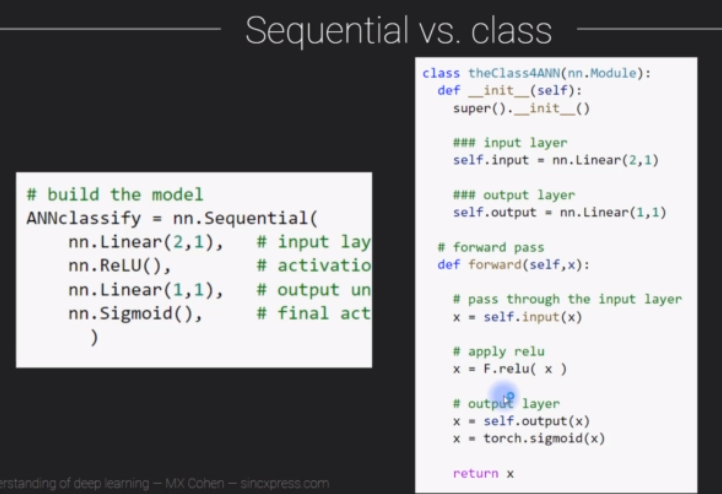

 ### class version __ALWAYS INHERITS nn.Module__

In [55]:
# ALternative implementation of the same

class ANNClass(nn.Module):
    def __init__(self):
        super().__init__()
        self.f1 = nn.Sequential(
            nn.Linear(2,4),
            nn.ReLU(),
            nn.Linear(4,3),
            nn.ReLU(),
            nn.Linear(3,1),
            nn.Sigmoid()
        )
    
    def forward(self, inp):
        op = self.f1(inp)
        return op

First approach would give flexibility to access the data between the layers, and modify it mid-processing of NN. Second approach is more readable and can be used when architecture is fixed and established.

In [58]:
import torch.nn.functional as F

# Gives specific functionality at instance-level

### Converting MLP into class version

In [63]:
class MultiANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.f1 = nn.Linear(2, 1) # inp layer
        self.f2 = nn.Linear(1, 1) # op layer
    
    def forward(self, x):
        x = self.f1(x) # through inp layer
        
        x = F.relu(x) # activation fn
        
        x = self.f2(x) # op layer
        
        x = torch.sigmoid(x) # sigmoid activation
        
        return x

# creating instance
ANN = MultiANN()

Rest of the process is same as using regular training processes

# Model Depth vs Breadth - Parametric Experiments

Using Iris dataset.

We also parametrically manipulate the ANN from class version

In [66]:
iris = sns.load_dataset('iris')
# Organizing the data
data = torch.tensor(iris[iris.columns[:4]].values).float()

# transforming species to numbers
labels = torch.zeros(len(data), dtype=torch.long)
# Let Setosa already imply 0
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

In [75]:
# class for ANN model

class IrisANN(nn.Module):
    def __init__(self, nUnits, nLayers):
        super().__init__()
        
        self.layers = nn.ModuleDict() # dict to store layers of ANN
        self.nLayers = nLayers
        
        self.layers['inp'] = nn.Linear(4, nUnits) # input layer
        
        for i in range(nLayers): # hidden layers
            self.layers[f'hidden{i}']  = nn.Linear(nUnits, nUnits)
        
        self.layers['op'] = nn.Linear(nUnits, 3) # output layers
    
    def forward(self, x):
        x = self.layers['inp'](x)
        
        for i in range(self.nLayers):
            x = F.relu( self.layers[f'hidden{i}'](x) )
        
        x = self.layers['op'](x)
        
        return x

In [76]:
nUnitsPerLayer = 12
nLayers = 4
net = IrisANN(nUnitsPerLayer, nLayers)
net

IrisANN(
  (layers): ModuleDict(
    (inp): Linear(in_features=4, out_features=12, bias=True)
    (hidden0): Linear(in_features=12, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (op): Linear(in_features=12, out_features=3, bias=True)
  )
)

__Quick test of running some numbers through the model.  
This ensures that architecture is internally consistent__

In [77]:
# 10 samples, 4 dimensions

tmp = torch.randn(10, 4)
y = net(tmp)
print(y.shape)
print(y)

torch.Size([10, 3])
tensor([[-0.1694, -0.0577, -0.3330],
        [-0.1698, -0.0578, -0.3343],
        [-0.1693, -0.0567, -0.3289],
        [-0.1697, -0.0566, -0.3302],
        [-0.1684, -0.0602, -0.3359],
        [-0.1690, -0.0596, -0.3367],
        [-0.1690, -0.0596, -0.3366],
        [-0.1669, -0.0619, -0.3342],
        [-0.1697, -0.0573, -0.3325],
        [-0.1677, -0.0630, -0.3419]], grad_fn=<AddmmBackward0>)


In [82]:
def trainModel(model):
     # loss function
    lossfn = nn.CrossEntropyLoss()

    # optimizer
    optim = torch.optim.SGD(model.parameters(), lr = 0.01)
    
    for i in range(nEp):

        #forward pass
        yHat = model(data)
        # compute loss
        loss = lossfn(yHat, labels)

        # backprop
        optim.zero_grad()
        loss.backward()
        optim.step()

    # prediction
    pred = model(data)
    pred_labels = torch.argmax(pred, axis=1)
    totalAcc = 100*torch.mean((pred_labels == labels).float())
    
    # number of trainable parameters
    nParam = np.sum([i.numel() for i in model.parameters() if i.requires_grad])

    return totalAcc, nParam

In [88]:
# Model Parameters
numLayers = range(1, 6) # number of layers in NN
numUnits = np.arange(4, 101, 3) # number of units in each layer

accuracies = np.zeros((len(numUnits), len(numLayers)))
nParams = np.zeros((len(numUnits), len(numLayers)))

nEp = 1000 # number of epochs

for unit in range(len(numUnits)):
    for layer in range(len(numLayers)):
        
        net = IrisANN(numUnits[unit], numLayers[layer])
        
        acc, nP = trainModel(net)
        
        accuracies[unit, layer] = acc
        nParams[unit, layer] = nP

Below plot shows that depth of the NN doesn't necessarily provide better performance

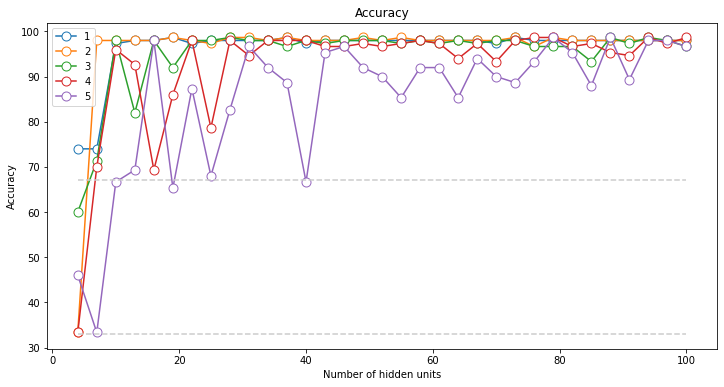

In [89]:
fig, ax = plt.subplots(1, figsize=(12, 6))

ax.plot(numUnits, accuracies, 'o-', markerfacecolor='w', markersize=9)
ax.plot(numUnits[[0,-1]], [33,33], '--', color=[.8,.8,.8])
ax.plot(numUnits[[0,-1]], [67,67], '--', color=[.8,.8,.8])
ax.legend(numLayers)
ax.set_xlabel('Number of hidden units')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy')
plt.show()

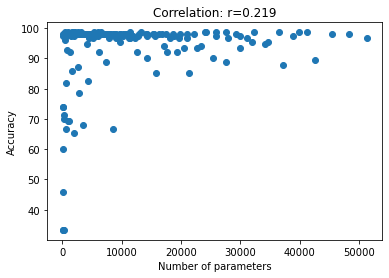

In [90]:
x = nParams.flatten()
y = accuracies.flatten()

r = np.corrcoef(x, y)[0,1]
plt.plot(x,y,'o')
plt.xlabel('Number of parameters')
plt.ylabel('Accuracy')
plt.title('Correlation: r=' + str(np.round(r,3)))
plt.show()

There is no correlation in number of trainable paramters and accuracy